# Feature engineering

---

## Fundamentals of ETL: data extraction, transformation and loading


Applied Mathematical Modeling in Banking

---

# Table of contents

---

# 1. What's Feature Engineering?


`Feature engineering` is the most important technique used in creating machine learning models. 

Feature Engineering is a basic term used to cover many operations that are performed on the variables(features) to fit them into the algorithm. **It helps in increasing the accuracy** of the model thereby enhances the results of the predictions. Feature Engineered machine learning models perform better on data than basic machine learning models. The following aspects of feature engineering are as follows [1]:

1. `Feature Scaling`: It is done to get the features on the same scale( for eg. Euclidean distance).
2. `Feature Transformation`: It is done to normalize the data(feature) by a function.
3. `Feature Construction`: It is done to create new features based on original descriptors to improve the accuracy of the predictive model.

A `"feature"` in the context of predictive modeling is just another name for a `predictor variable`. Feature engineering is the general term for creating and manipulating predictors so that a good predictive model can be created.

---

# 2. Feature Scaling

`Feature Scaling` refers to putting the values in the same range or same scale so that no variable is dominated by the other.

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.

If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

Here’s the curious thing about feature scaling – it improves (significantly) the performance of some machine learning algorithms and does not work at all for others.

Also, what’s the difference between normalization and standardization? These are two of the most commonly used feature scaling techniques in machine learning but a level of ambiguity exists in their understanding. 

---

## 2.1. Normalization

### Theory

**Normalization** is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as **`Min-Max scaling`**.

Here’s the formula for normalization:

<center>$X' = \frac{X-X_{min}}{X_{max} - X_{min}}$</center>

Here, $X_{max}$ and $X_{min}$ are the maximum and the minimum values of the feature respectively.

When the value of $X$ is the minimum value in the column, the numerator will be $0$, and hence $X'$ is $0$.

On the other hand, when the value of $X$ is the maximum value in the column, the numerator is equal to the denominator and thus the value of $X'$ is $1$.

If the value of $X$ is between the minimum and the maximum value, then the value of $X'$ is between $0$ and $1$.

---

### Practice

So, let's implement own normalization function.

In [2]:
# Lets use client churn dataset from telco: https://www.kaggle.com/blastchar/telco-customer-churn
churn_data <- read.csv("data/telecom_users.csv")
head(churn_data)

,X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,⋯,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No
2,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,⋯,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
3,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,⋯,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
4,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,⋯,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.9,238.50,No
5,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,⋯,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
6,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,⋯,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No


In [2]:
str(churn_data)

'data.frame':	5986 obs. of  22 variables:
 $ X               : int  1869 4528 6344 6739 432 2215 5260 6001 1480 5137 ...
 $ customerID      : chr  "7010-BRBUU" "9688-YGXVR" "9286-DOJGF" "6994-KERXL" ...
 $ gender          : chr  "Male" "Female" "Female" "Male" ...
 $ SeniorCitizen   : int  0 0 1 0 0 0 0 0 0 1 ...
 $ Partner         : chr  "Yes" "No" "Yes" "No" ...
 $ Dependents      : chr  "Yes" "No" "No" "No" ...
 $ tenure          : int  72 44 38 4 2 70 33 1 39 55 ...
 $ PhoneService    : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ MultipleLines   : chr  "Yes" "No" "Yes" "No" ...
 $ InternetService : chr  "No" "Fiber optic" "Fiber optic" "DSL" ...
 $ OnlineSecurity  : chr  "No internet service" "No" "No" "No" ...
 $ OnlineBackup    : chr  "No internet service" "Yes" "No" "No" ...
 $ DeviceProtection: chr  "No internet service" "Yes" "No" "No" ...
 $ TechSupport     : chr  "No internet service" "No" "No" "No" ...
 $ StreamingTV     : chr  "No internet service" "Yes" "No" "No" ...
 $ Streaming

In [3]:
# next check summary of values
summary(churn_data$TotalCharges)

# check TotalCharges field

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   18.8   404.3  1412.2  2298.1  3847.0  8684.8      10 

Next, lets build histogram of `Income` and check how it splited with `ggplot2`:

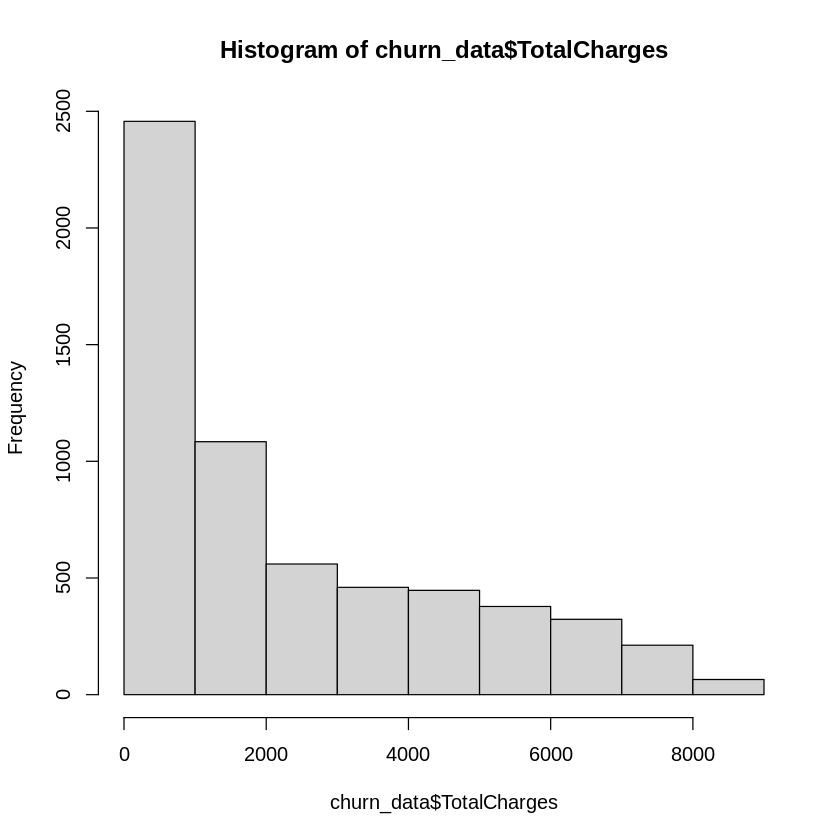

In [12]:
hist(churn_data$TotalCharges, breaks = 12)

In [8]:
#install.packages("ggplot2")
library(ggplot2)

`ggplot()` - function for building charts

`data` - first parameter - dataset 

`aes()` - authetics - visualition axis / Construct aesthetic mappings

`geom_CHART_TYPE()` - set the chart type

`geom_histogram()` - Histograms and frequency polygons

//`theme_set()` - theme configutation

Warning message:
"Removed 10 rows containing non-finite values (stat_bin)."


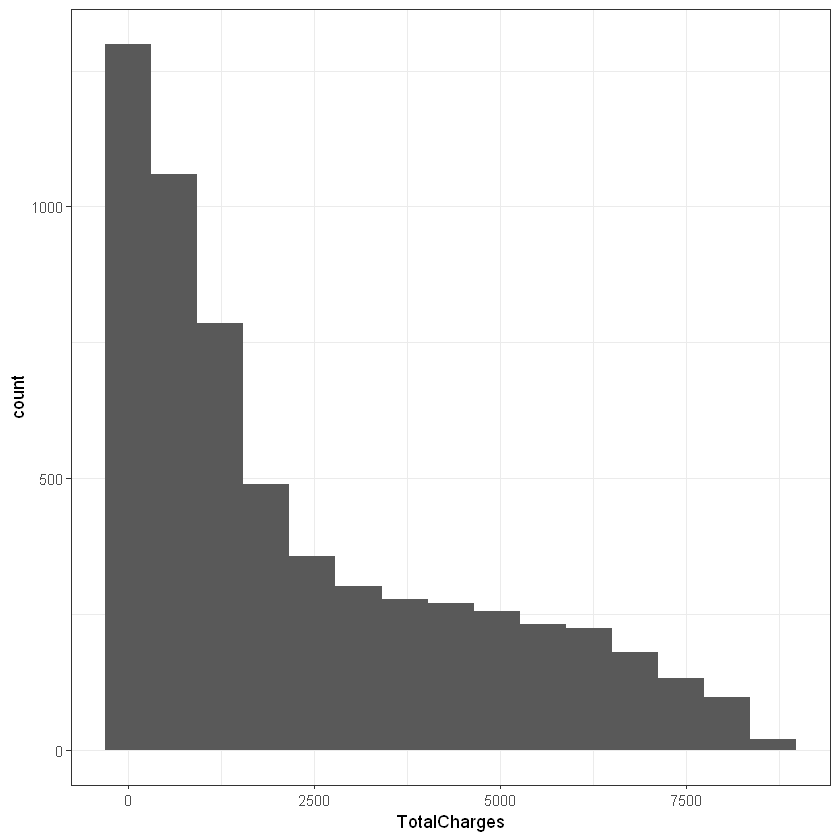

In [13]:
ggplot(data = churn_data, aes(x=TotalCharges)) + geom_histogram(bins = 15)

# try theme

[1] FALSE

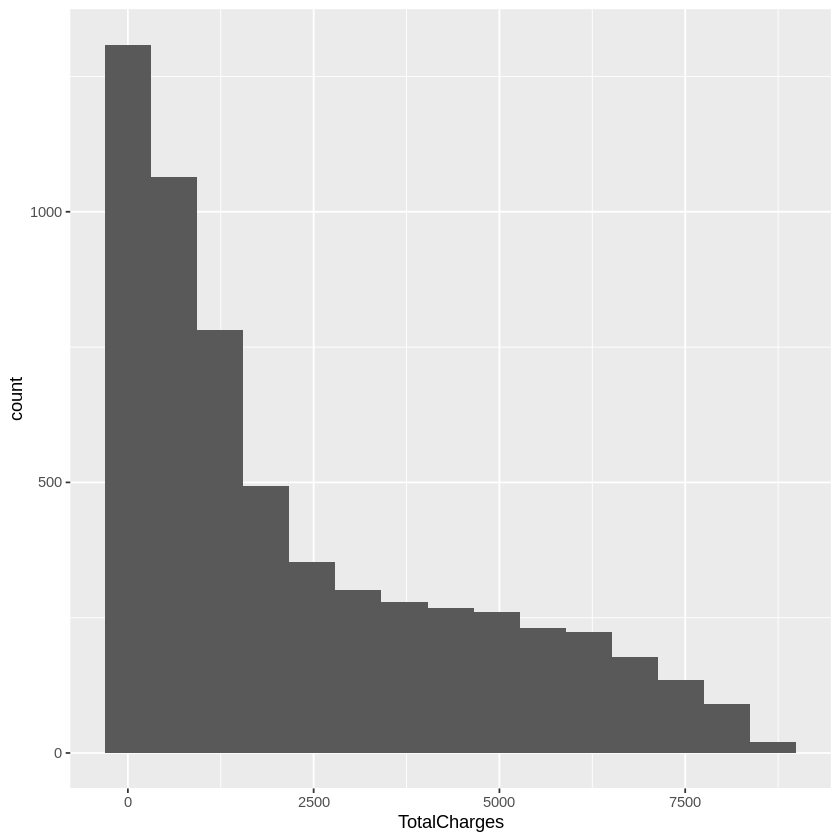

In [9]:
# Lets replace missing with 0 zero for TotalCharges 
library(magrittr) # if pipe not loaded
library(dplyr) # for nutate function

anyNA(churn_data$TotalCharges)

churn_data[is.na(churn_data$TotalCharges), "TotalCharges"] = 0

ggplot(churn_data, aes(x=TotalCharges)) + geom_histogram(bins = 15)

In [13]:
# Lets implement own normalization function by fomula explained earlie
normalizeData <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [14]:
# Normalize TotalCharges
churn_data <- churn_data %>%
    mutate(TotalChargesNorm = normalizeData(TotalCharges))

,X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,⋯,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNorm
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,⋯,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No,0.19973402
2,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,⋯,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0.45748895
3,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,⋯,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0.33044515
4,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,⋯,No,No,Yes,Month-to-month,Yes,Electronic check,55.9,238.50,No,0.02746177
5,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,⋯,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,0.01375967
6,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,⋯,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No,0.38805730


In [19]:
churn_data %>% slice_max(TotalCharges, n=5) # check the last columns
churn_data %>% slice_min(TotalCharges, n=25) # check the last columns

X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,⋯,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNorm
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,⋯,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.8,8684.80,Yes,1.0000000
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,⋯,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,0.9985780
5347,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,⋯,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No,0.9895910
2187,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,⋯,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No,0.9861770
6118,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,⋯,Yes,Yes,Yes,Two year,Yes,Electronic check,118.2,8547.15,No,0.9841505


X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,⋯,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNorm
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,⋯,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.9,0.00,No,0.000000000
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,⋯,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.00,No,0.000000000
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,⋯,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.00,No,0.000000000
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,⋯,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.7,0.00,No,0.000000000
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,⋯,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.00,No,0.000000000
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,⋯,No,Yes,Yes,Two year,No,Mailed check,80.85,0.00,No,0.000000000
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,⋯,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.00,No,0.000000000
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,⋯,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.0,0.00,No,0.000000000
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,⋯,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.00,No,0.000000000


In [20]:
#summary for the last field
summary(churn_data$TotalChargesNorm)

#its from 1 to zero

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.04624 0.16219 0.26417 0.44232 1.00000 

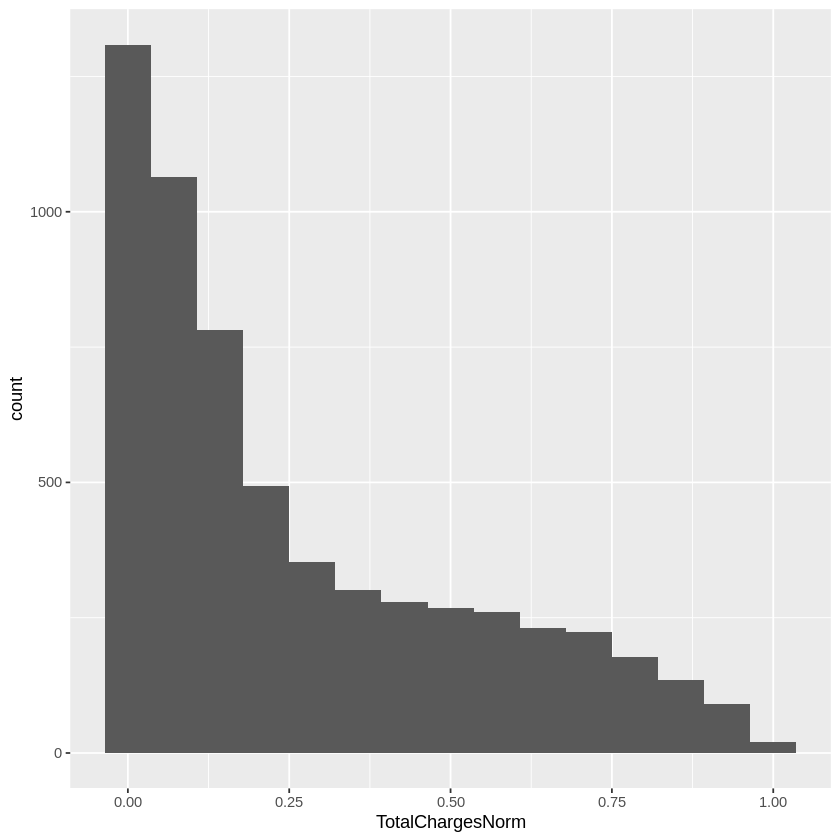

In [21]:
# And lets make a histogram
ggplot(churn_data, aes(x=TotalChargesNorm)) + geom_histogram(bins = 15)

We observe identical histograms even though the `TotalCharges / TotalChargesNorm` axis is rescaled.

Therefore we show that **normalization didn't affect the distribution properties** of the rescaled data.

---

## 2.2. Standardization

### Theory

`Standardization` is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:

<center>$X' = \frac{X-\mu}{\sigma}$</center>

Feature scaling: $\mu$ is the mean of the feature values and Feature scaling: $\sigma$ is the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range.

Now, the big question in your mind must be when should we use normalization and when should we use standardization?

Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.
However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

### Practice

Lets write own function for standartization:

In [28]:
# if sdev is NA - calculate start deviation from data

standartize <- function(data) {    
    sdev = sd(data, na.rm = TRUE)  
    data <- (data - mean(data, na.rm = T)) / sdev
    return (data)    
}

In [29]:
churn_data <- churn_data %>%
    mutate(TotalChargesStand = standartize(TotalCharges))

Lets compare data distribution fot normalization and standartization.

In [38]:
install.packages("gridExtra") # to view 2+ ggplots 
library(gridExtra)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




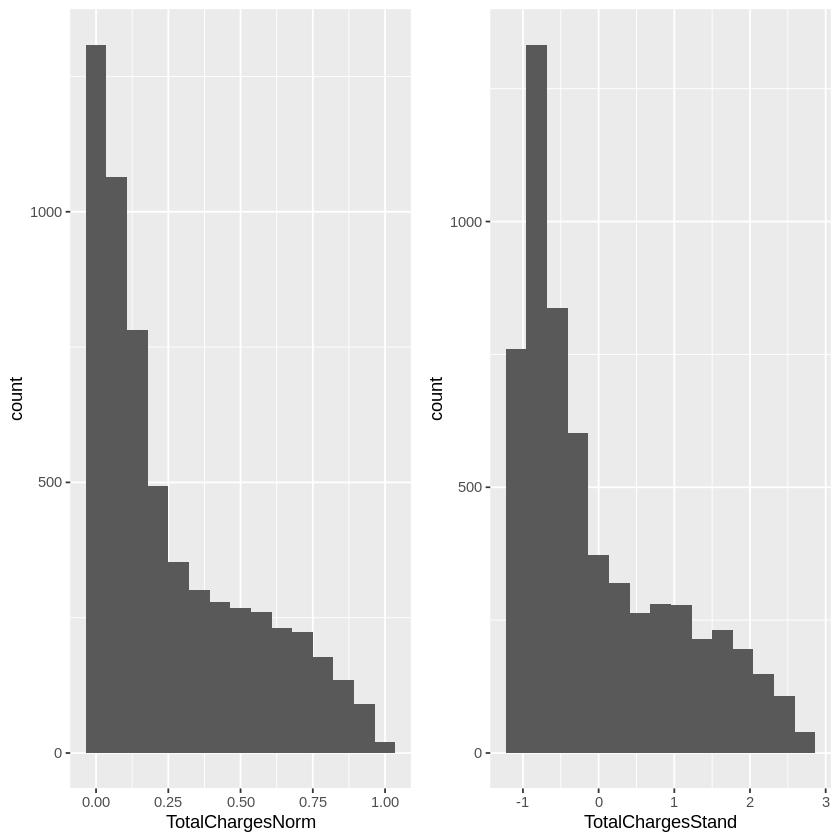

In [39]:
n_plot <- ggplot(churn_data, aes(x=TotalChargesNorm)) + geom_histogram(bins = 15)
s_plot <- ggplot(churn_data, aes(x=TotalChargesStand)) + geom_histogram(bins = 15)
grid.arrange(n_plot, s_plot, ncol=2) # from gridExtra
# data distribution changed after standartisation scaling

So, lets use stardart `R` function for scaling and compare results:

In [36]:
# the next 
churn_data <- churn_data %>%
        mutate(TotalChargesScaled = scale(TotalCharges)) 

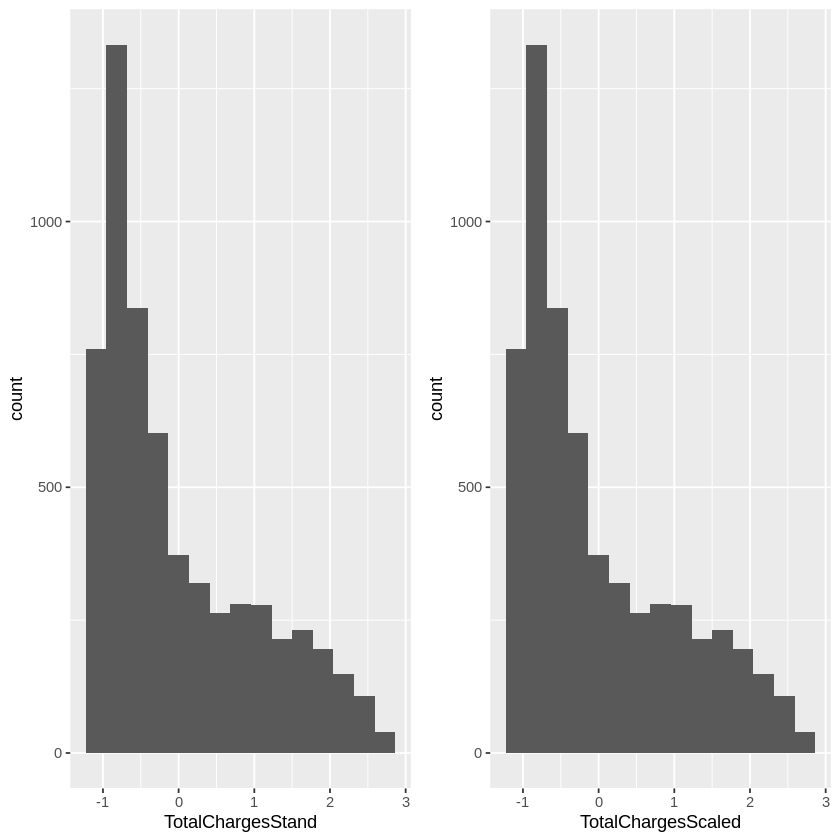

In [40]:
s1_plot <- ggplot(churn_data, aes(x=TotalChargesStand)) + geom_histogram(bins = 15)
s2_plot <- ggplot(churn_data, aes(x=TotalChargesScaled)) + geom_histogram(bins = 15)
grid.arrange(s1_plot, s2_plot, ncol=2) # it looks like we created the same function 

Look like default function has the same result as our.

In [38]:
head(churn_data) # check last two columns, its the same

,X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNorm,TotalChargesStand,TotalChargesScaled
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No,0.19973402,-0.2460559,-0.2460559
2,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0.45748895,0.7382838,0.7382838
3,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0.33044515,0.2531165,0.2531165
4,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,Yes,Month-to-month,Yes,Electronic check,55.9,238.50,No,0.02746177,-0.9039460,-0.9039460
5,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,No,Month-to-month,No,Electronic check,53.45,119.50,No,0.01375967,-0.9562729,-0.9562729
6,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No,0.38805730,0.4731314,0.4731314


---

### Scaling for train/test/validation/prediction

If you use scaling initial parameters should be remembered somewhere for future prediction data and reimplemented for new/test/validation/prediction dataset

For experiment lets split our dataset for train and test:

In [41]:
library(caret)
set.seed(2021)
 
index = createDataPartition(churn_data$Churn, p = 0.70, list = FALSE)
train = churn_data[index, ]
test = churn_data[-index, ]

nrow(churn_data)
nrow(train)
nrow(test)

Loading required package: lattice



[1] 5986

[1] 4191

[1] 1795

Lets rescale `TotalCharges` data for training set:

In [42]:
train <- train %>% mutate(TotalChargesScaled = scale(TotalCharges))
head(train) # you can see that TotalChangesStand and TotalChangesScaled are different becouse of changed mean and standart deviation of data

,X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,⋯,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNorm,TotalChargesStand,TotalChargesScaled
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,"<dbl[,1]>"
1,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,⋯,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No,0.19973402,-0.2460559,-0.2516955
5,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,⋯,No,Month-to-month,No,Electronic check,53.45,119.50,No,0.01375967,-0.9562729,-0.9584688
9,1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,⋯,No,One year,No,Mailed check,35.55,1309.15,No,0.15074037,-0.4331576,-0.4378900
10,5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,⋯,Yes,Month-to-month,Yes,Electronic check,116.5,6382.55,No,0.73491042,1.7977280,1.7821786
11,3169,4578-PHJYZ,Male,0,Yes,Yes,52,Yes,No,DSL,⋯,No,One year,Yes,Electronic check,68.75,3482.85,No,0.40102823,0.5226661,0.5132992
12,4653,2091-MJTFX,Female,0,Yes,Yes,30,No,No phone service,DSL,⋯,Yes,Month-to-month,No,Credit card (automatic),51.2,1561.50,Yes,0.17979689,-0.3221938,-0.3274642


In [43]:
mean(churn_data$TotalCharges, na.rm = T)
mean(train$TotalCharges, na.rm = T)
# means are different

[1] 2294.222

[1] 2309.836

In [44]:
sd(churn_data$TotalCharges, na.rm = T)
sd(train$TotalCharges, na.rm = T)

# standart deviation are different

[1] 2274.164

[1] 2285.245

So, for train, test and prediction  data we should use the same `scaling base`, in this case `mean` and `standart deviation`.

Correct data scaling code should be like this:

In [45]:
# fix mean and sd
meanTotalCharges = mean(train$TotalCharges, na.rm = T)
sdTotalCharges = sd(train$TotalCharges, na.rm = T)

train <- train %>% mutate(TotalChargesScaled = scale(TotalCharges, center = meanTotalCharges, scale = sdTotalCharges)) # default
test <- test %>% mutate(TotalChargesScaled = scale(TotalCharges, center = meanTotalCharges, scale = sdTotalCharges)) # use parameters of train set

#check the same value TotalCharges == 0 in train and set
head(train %>% filter(TotalCharges == 0))
head(test %>% filter(TotalCharges == 0))

,X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,⋯,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNorm,TotalChargesStand,TotalChargesScaled
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,"<dbl[,1]>"
1,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,⋯,No,Two year,Yes,Bank transfer (automatic),61.9,0,No,0,-1.00882,-1.010761
2,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,⋯,No internet service,Two year,No,Mailed check,25.35,0,No,0,-1.00882,-1.010761
3,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,⋯,No internet service,One year,Yes,Mailed check,19.7,0,No,0,-1.00882,-1.010761
4,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,⋯,No internet service,Two year,No,Mailed check,19.85,0,No,0,-1.00882,-1.010761
5,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,⋯,No internet service,Two year,No,Mailed check,20.25,0,No,0,-1.00882,-1.010761
6,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,⋯,No,Two year,Yes,Bank transfer (automatic),52.55,0,No,0,-1.00882,-1.010761


,X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,⋯,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNorm,TotalChargesStand,TotalChargesScaled
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,"<dbl[,1]>"
1,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,⋯,No,Two year,No,Credit card (automatic),56.05,0,No,0,-1.00882,-1.010761
2,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,⋯,Yes,Two year,No,Mailed check,80.85,0,No,0,-1.00882,-1.010761
3,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,⋯,No internet service,Two year,No,Mailed check,20.0,0,No,0,-1.00882,-1.010761


In [100]:
#compare it with all dataset TotalCharges == 0

In [46]:
filter(churn_data, TotalCharges == 0)
# for now TotalChargesScaled in train/test th same, but in churn data its different, because of diffrent scaling bases

X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,⋯,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNorm,TotalChargesStand,TotalChargesScaled
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,"<dbl[,1]>"
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,⋯,No,Two year,Yes,Bank transfer (automatic),61.9,0,No,0,-1.00882,-1.00882
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,⋯,No,Two year,No,Credit card (automatic),56.05,0,No,0,-1.00882,-1.00882
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,⋯,No internet service,Two year,No,Mailed check,25.35,0,No,0,-1.00882,-1.00882
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,⋯,No internet service,One year,Yes,Mailed check,19.7,0,No,0,-1.00882,-1.00882
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,⋯,No internet service,Two year,No,Mailed check,19.85,0,No,0,-1.00882,-1.00882
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,⋯,Yes,Two year,No,Mailed check,80.85,0,No,0,-1.00882,-1.00882
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,⋯,No internet service,Two year,No,Mailed check,20.25,0,No,0,-1.00882,-1.00882
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,⋯,No internet service,Two year,No,Mailed check,20.0,0,No,0,-1.00882,-1.00882
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,⋯,No,Two year,Yes,Bank transfer (automatic),52.55,0,No,0,-1.00882,-1.00882


---

# 2. Feature Transformation

`Feature transformation` involves manipulating a predictor variable in some way so as to improve its performance in the predictive model. A variety of considerations come into play when transforming models, including:

- [x] The `flexibility` of machine learning and statistical models in dealing with different types of data. For example, some techniques require that the input data be in numeric format, whereas others can deal with other formats, such as categorical, text, or dates.
- [x] `Ease of interpretation`. A predictive model where all the predictors are on the same scale (e.g., have a mean of 0 and a standard deviation of 1), can make interpretation easier.
- [x] `Predictive accuracy`. Some transformations of variables can improve the accuracy of prediction (e.g., rather than including a numeric variable as a predictor, instead include both it and a second variable that is its square).
- [x] `Theory`. For example, economic theory dictates that in many situations the natural logarithm of data representing prices and quantities should be used.
- [x] `Computational error`. Many algorithms are written in such a way that "large" numbers cause them to give the wrong result, where "large" may not be so large (e.g., more than 10 or less than -10).

## Scaling based on calculations

Sometimes for changing data distribution before using in modeling or change correlation between input and output variables scientist changes data type with standart mathematical functions. Lets try transform `TotalCharges` with logarithm, sqrt and power up 2.

Warning message:
“Removed 10 rows containing non-finite values (stat_bin).”


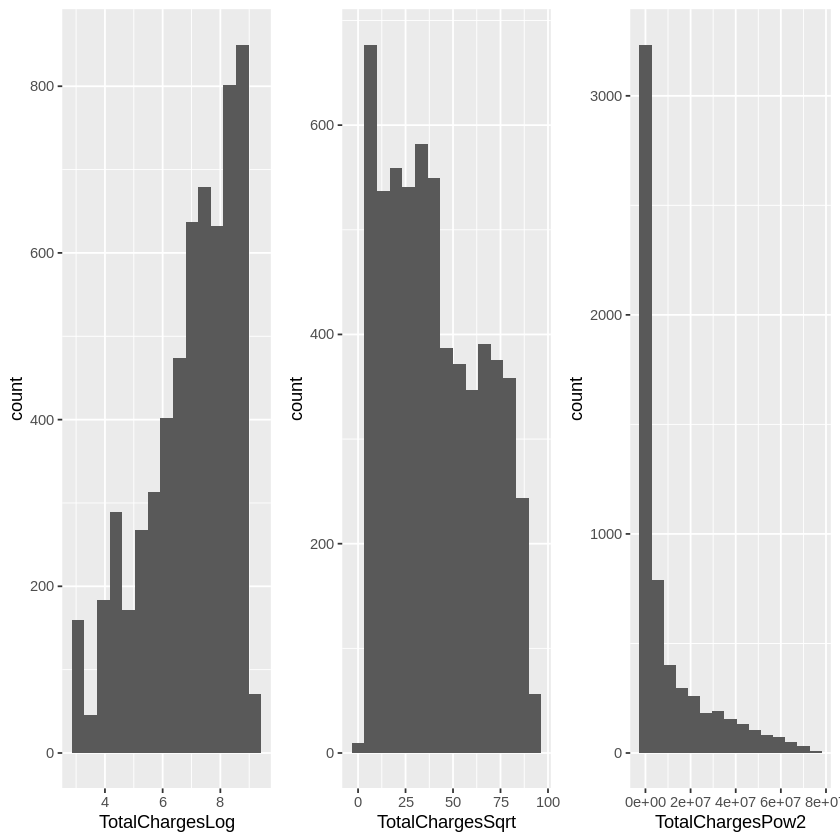

In [47]:
churn_data_tmp <- churn_data %>%
        mutate(TotalChargesLog = log(TotalCharges),
              TotalChargesSqrt = sqrt(TotalCharges),
              TotalChargesPow2 = TotalCharges^2)

plot1 <- ggplot(churn_data_tmp, aes(x=TotalChargesLog)) + geom_histogram(bins = 15)
plot2 <- ggplot(churn_data_tmp, aes(x=TotalChargesSqrt)) + geom_histogram(bins = 15)
plot3 <- ggplot(churn_data_tmp, aes(x=TotalChargesPow2)) + geom_histogram(bins = 15)
grid.arrange(plot1, plot2, plot3, ncol=3) 

<div class="alert alert-danger">Увага! Далі пропускаємо і переходимо до Feature Construction</div>

Lets try

In [49]:
churn_data_tmp <- churn_data_tmp %>%
        mutate(Churn = ifelse(Churn == "Yes", 1, 0))
head(churn_data_tmp)

,X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,⋯,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNorm,TotalChargesStand,TotalChargesScaled,TotalChargesLog,TotalChargesSqrt,TotalChargesPow2
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>
1,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,⋯,Credit card (automatic),24.1,1734.65,0,0.19973402,-0.2460559,-0.2460559,7.458561,41.64913,3009010.62
2,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,⋯,Credit card (automatic),88.15,3973.20,0,0.45748895,0.7382838,0.7382838,8.287327,63.03332,15786318.24
3,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,⋯,Bank transfer (automatic),74.95,2869.85,1,0.33044515,0.2531165,0.2531165,7.962015,53.57098,8236039.02
4,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,⋯,Electronic check,55.9,238.50,0,0.02746177,-0.9039460,-0.9039460,5.474369,15.44345,56882.25
5,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,⋯,Electronic check,53.45,119.50,0,0.01375967,-0.9562729,-0.9562729,4.783316,10.93161,14280.25
6,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,⋯,Bank transfer (automatic),49.85,3370.20,0,0.38805730,0.4731314,0.4731314,8.122727,58.05342,11358248.04


**Conclusion:**  different scaling gives different data distribution and may improves model perfomance if you have found the correct form of dependence of input/ouput parameters.

In [50]:
cor(churn_data_tmp$TotalChargesScaled, churn_data_tmp$Churn)

-0.1963895


In [89]:
cor(churn_data_tmp$TotalChargesLog, churn_data_tmp$Churn)

Warning message in cor(churn_data_tmp$TotalChargesLog, churn_data_tmp$Churn):
"the standard deviation is zero"


[1] NA

In [82]:
cor(churn_data_tmp$TotalChargesSqrt, churn_data_tmp$Churn)

[1] -0.221665

In [102]:
cor(churn_data_tmp$TotalChargesPow2, churn_data_tmp$Churn)

Warning message in cor(churn_data_tmp$TotalChargesPow2, churn_data_tmp$Churn):
"the standard deviation is zero"


[1] NA

# 3. Feature Construction

The **`feature Construction`** method helps in creating new features in the data thereby increasing model accuracy and overall predictions. It is of two types:

- [x] `Binning`: Bins are created for continuous variables.
- [x] `Encoding`: Numerical variables or features are formed from categorical variables.

 Додано мною, бо не знайшов ніде такого прийому) Всі одразу моделюють))
- [x] `Evaluation` - construction new features on raw data from datasource.

## 3.1. Binning

`Binning` is done to create bins for continuous variables where they are converted to categorical variables. 

`Binning` is the term used in scoring modeling for what is also known in Machine Learning as `Discretization`, the process of transforming a continuous characteristic into a finite number of intervals (the bins), which allows for a better understanding of its distribution and its relationship with a binary variable. The bins generated by the this process will eventually become the attributes of a predictive characteristic, the key component of a Scorecard.

Why Binning?

- [x] It allows missing data and other special calculations (e.g. divided by zero) to be included in the model.
- [x] It controls or mitigates the impact of outliers over the model.
- [x] It solves the issue of having different scales among the characteristics, making the weights of the coefficients in the final model comparable.

There are two types of binning: `Unsupervised` and `Supervised`.

`Unsupervised Binning` involves Automatic and Manual binning. In Automatic Binning, bins are created without human interference and are created automatically.  In Manual Binning, bins are created with human interference and we specify where the bins to be created.

`Supervised Binning` involves creating bins for the continuous variable while taking the target variable into the consideration also. `Supervised Discretization or Binning` divides a continuous feature into groups (bins) mapped to a target variable. The central idea is to find those cutpoints that maximize the difference between the groups.

In the past, analysts used to iteratively move from Fine Binning to Coarse Binning, a very time consuming process of finding manually and visually the right cutpoints (if ever). Nowadays with algorithms like ChiMerge or Recursive Partitioning, two out of several techniques available, analysts can quickly find the optimal cutpoints in seconds and evaluate the relationship with the target variable using metrics such as Weight of Evidence and Information Value.

There are many packages for creating new variables: `smbinning`, `scorecard`, `rbin`, `InformationValue` and other.

### 3.2.1. `smbinning` package

In [105]:
#install.packages("smbinning")
library(smbinning)

Loading required package: sqldf

Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite

Warning message:
"package 'RSQLite' was built under R version 4.1.0"
Loading required package: partykit

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: Formula



In [18]:
# read data
churn_data <- read.csv("data/telecom_users.csv")
head(churn_data)

,X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No
2,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
3,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
4,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.9,238.50,No
5,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
6,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No


In [19]:
data(chileancredit) 
# Training and testing samples 
chileancredit.train=subset(chileancredit,FlagSample==1) 
chileancredit.test=subset(chileancredit,FlagSample==0) 
# Run and save results 
result=smbinning(df=chileancredit.train,y="FlagGB",x="TOB",p=0.05) 
result$ivtable
 
# Relevant plots (2x2 Page) 
par(mfrow=c(2,2)) 
boxplot(chileancredit.train$TOB~chileancredit.train$FlagGB, 
horizontal=T, frame=F, col="lightgray",main="Distribution") 
mtext("Time on Books (Months)",3) 
smbinning.plot(result,option="dist",sub="Time on Books (Months)") 
smbinning.plot(result,option="badrate",sub="Time on Books (Months)") 
smbinning.plot(result,option="WoE",sub="Time on Books (Months)")

Warning message in data(chileancredit):
"data set 'chileancredit' not found"


ERROR: Error in subset(chileancredit, FlagSample == 1): object 'chileancredit' not found


### 3.2.2. `scorecard` package

### 3.2. Encoding

`Encoding` is the process in which numerical variables or features are created from `categorical` variables. It is a widely used method in the industry and in every model building process. It is of two types: `Label Encoding` and `One-hot Encoding`.

`Label Encoding` involves assigning each label a unique integer or value based on alphabetical ordering. It is the most popular and widely used encoding.

`One-hot Encoding` involves creating additional features or variables on the basis of unique values in categorical variables i.e. every unique value in the category will be added as a new feature.

### 3.2.1. On-hot encoding

In [ ]:
# Lets use client churn dataset from telco: https://www.kaggle.com/blastchar/telco-customer-churn
churn_data <- read.csv("data/telecom_users.csv")
head(churn_data)

In [ ]:
# check possible Gender values
gmodels::CrossTable(churn_data$gender)

Lets create two additional variables `Male` and `Female` encoded by 1 / 0:

- [x] Create a Male column that encodes each row corresponding to male as 1 and set everything else to 0.
- [x] Create a Female column that encodes each row corresponding to female as 1 and set everything else to 0.

In [ ]:
# if gender is factor
#churn_data <- churn_data %>% 
   #     mutate(gender = as.character(gender)) # convert Gender to character from Factor

churn_data <- churn_data %>% 
        mutate(
            # create Male column
            Male = ifelse(gender == "Male", 1, 0),
            # create Female column
            Female = ifelse(gender == "Female", 1, 0))

head(churn_data)

Lets create a dummy variables for `InternetService` column. So, what data it has for now?

In [ ]:
gmodels::CrossTable(churn_data$InternetService)

The function `dummyVars()` from `caret` package can be used to generate a complete (less than full rank parameterized) set of dummy variables from one or more factors. The function takes a formula and a data set and outputs an object that can be used to create the dummy variables using the predict method.

In [ ]:
library(caret)
dummy <- dummyVars(" ~ InternetService", data = churn_data)
new_df <- data.frame(predict(dummy, newdata = churn_data)) # precit dummy variables and
new_df %>% head()

If you want create dummy variables for all categoriacal columns just use `" ~ ."` formula.

If you need some few do this:

In [2]:
dummy <- dummyVars(" ~ InternetService + PhoneService", data = churn_data)
new_df <- data.frame(predict(dummy, newdata = churn_data)) # precit dummy variables and
new_df %>% head()

ERROR: Error in dummyVars(" ~ InternetService + PhoneService", data = churn_data): could not find function "dummyVars"


## 3.3. Evaluate data on raw dataset

In [50]:
# read transaction data from dataset
# explore file in Excel before reading to check sheet numbers and tables structure
library(xlsx)
demographics <- read.xlsx("data/transactions.xlsx", sheetIndex = 1)
head(demographics)

,CustomerID,Gender,Email,VisitsLastYear
,<dbl>,<chr>,<chr>,<dbl>
1,787987456,Male,Yes,12
2,456415151,Male,NULL,0
3,215454555,Female,No,16
4,985121122,Female,No,4


In [51]:
# read transactions
transactions <- read.xlsx("data/transactions.xlsx", sheetIndex = 2)
head(transactions)

,CustomerID,ContractID,Date,Time,ContractorID,UsdEquiv_sum,Type
,<dbl>,<dbl>,<date>,<dbl>,<chr>,<dbl>,<chr>
1,215454555,19065798,2019-03-15,114537,NULL,6293.7111,credet
2,215454555,19065798,2019-04-05,102525,NULL,914.9459,credet
3,215454555,19065798,2019-05-11,80833,NULL,-4655.9111,debet
4,215454555,19065798,2019-05-16,74606,NULL,-13900.6889,debet
5,215454555,19065798,2019-05-30,104506,NULL,2102.0570,credet
6,215454555,19065798,2019-08-23,122656,NULL,-16244.2333,debet


Out nex task is to construct new features based on transactions history:

- [x] `Churn` - target parameter if client has more than 60 days absent transactions between 2021-04-30 and last transaction date.
- [x] `ContractsCount` last 3 month `before event Churn == 1/0`

In [52]:
# lets find a maximum transaction date for each client
library(tidyverse) # includes magrittr, dplyr
max_dates <- transactions %>%
        group_by(CustomerID) %>%
        summarise(MaxDate = max(Date))
max_dates

CustomerID,MaxDate
<dbl>,<date>
215454555,2021-04-30
456415151,2021-01-22
787987456,2019-12-06
985121122,2020-09-09


In [53]:
library(lubridate) #for datetime manipulation
current_date <- ymd("2021-04-30")
max_dates <- max_dates %>%
        mutate(DaysDiff = as.period(current_date - MaxDate) %>% day()) # find period and convert it to days
max_dates

CustomerID,MaxDate,DaysDiff
<dbl>,<date>,<dbl>
215454555,2021-04-30,0
456415151,2021-01-22,98
787987456,2019-12-06,511
985121122,2020-09-09,233


In [54]:
# lests calculate Churn feature
max_dates <- max_dates %>%
        mutate(Churn = ifelse(DaysDiff > 60, 1, 0))
max_dates

CustomerID,MaxDate,DaysDiff,Churn
<dbl>,<date>,<dbl>,<dbl>
215454555,2021-04-30,0,0
456415151,2021-01-22,98,1
787987456,2019-12-06,511,1
985121122,2020-09-09,233,1


You can finally merge code into one query:

In [55]:
churn_eval <- transactions %>%
        group_by(CustomerID) %>%
        summarise(MaxDate = max(Date)) %>%
        mutate(DaysDiff = as.period(current_date - MaxDate) %>% day(),
               Churn = ifelse(DaysDiff > 60, 1, 0)) %>%
        select(CustomerID, Churn) # Select only CustomerID and new feature / target
churn_eval # we will merge it with demographics later

CustomerID,Churn
<dbl>,<dbl>
215454555,0
456415151,1
787987456,1
985121122,1


# ContractsCount last 3 month before event Churn == 1/0

In [56]:
### TASK: calculate average sum of contract for each customer by credet

# 1. Find max transaction date
# 2. Find transaction date 3 month ago (max transaction date - 3 month)
# 3. Filter only records in range (-3 month, max_transaction)
# 4. Group data by contracts and find every contract sum
# 5. Group data by customers and find every customer average

In [61]:
avgContractSum3m <- transactions %>%
        filter(Type == "credet") %>%
        group_by(CustomerID) %>%
        mutate(MaxDate = max(Date),
               Month3Date = MaxDate %m+% months(-3)) %>%
       filter(Date >= Month3Date) %>%
       group_by(CustomerID, ContractID) %>%
       summarize(ContractSum = sum(UsdEquiv_sum), .groups = 'drop') %>%
       group_by(CustomerID) %>%
       summarise(AvgContractSum3m = mean(ContractSum))

avgContractSum3m

CustomerID,AvgContractSum3m
<dbl>,<dbl>
215454555,45541.3335
456415151,1271.5930
787987456,116.6667
985121122,4444.4444


Find last 3 average debit sum increase:

In [95]:
### TASK. 
# 1.

x1 <- transactions %>%
        filter(Type == "credet") %>%
        select(CustomerID, Date, UsdEquiv_sum) %>%
        group_by(CustomerID) %>%
        mutate(MaxDate = max(Date),
               Month1Before = MaxDate %m+% months(-1),
               Month2Before = MaxDate %m+% months(-2),
               Month3Before = MaxDate %m+% months(-3)) 
#x1

m1 <- x1 %>%
    filter(Date >= Month1Before & Date <= MaxDate) %>%
    group_by(CustomerID) %>%
    summarise(M1Sum = sum(UsdEquiv_sum)) %>% 
    left_join(x1 %>% 
              filter(Date >= Month2Before & Date <= Month1Before) %>%
              group_by(CustomerID) %>%
              summarise(M2Sum = sum(UsdEquiv_sum)), by = "CustomerID") %>%
            left_join(x1 %>% 
              filter(Date >= Month3Before & Date <= Month2Before) %>%
              group_by(CustomerID) %>%
              summarise(M3Sum = sum(UsdEquiv_sum)), by = "CustomerID") %>%
    rowwise %>%
    mutate(AvgDebetSumInc = mean(c(M1Sum/M2Sum, M2Sum/M3Sum), na.rm = T)) %>%
    select(CustomerID, AvgDebetSumInc)
        
m1 

#%>%
       # group_by(CustomerID) %>%
    #    summarise(M1Sum = sum(UsdEquiv_sum))
#x2
      # filter(Date >= Month3Date) %>%
      # group_by(CustomerID, ContractID) %>%
      # summarize(ContractSum = sum(UsdEquiv_sum), .groups = 'drop') %>%
      # group_by(CustomerID) %>%
      # summarise(AvgContractSum3m = mean(ContractSum))

#head(avgDebitSumIncrease)

CustomerID,AvgDebetSumInc
<dbl>,<dbl>
215454555,8.3372521811
456415151,NaN
787987456,0.0003175611
985121122,NaN


Join all the tables

In [96]:
final_set <- demographics %>% 
        left_join(avgContractSum3m , by = "CustomerID") %>%
        left_join(churn_eval, by = "CustomerID")
final_set

CustomerID,Gender,Email,VisitsLastYear,AvgContractSum3m,Churn
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
787987456,Male,Yes,12,116.6667,1
456415151,Male,NULL,0,1271.5930,1
215454555,Female,No,16,45541.3335,0
985121122,Female,No,4,4444.4444,1


In [ ]:
On the next stages this data can be transformed with scaling, encoding, binning

---

## References

1. [Feature Engineering in R Programming](https://www.geeksforgeeks.org/feature-engineering-in-r-programming/) by @dhruv5819
2. [What is Feature Engineering?](https://www.displayr.com/what-is-feature-engineering/) by Tim Bok
3. [Feature Scaling-Why it is required?](https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310) by Rahul Saini
4. [Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/) by 
ANIRUDDHA BHANDARI
5. [R Package 'smbinning': Optimal Binning for Scoring Modeling by Herman Jopia](https://blog.revolutionanalytics.com/2015/03/r-package-smbinning-optimal-binning-for-scoring-modeling.html)
6. Garcia, S. et al (2013) A Survey of Discretization Techniques: Taxonomy and Empirical Analysis in Supervised Learning. IEEE Transactions on Knowledge and Data Engineering, Vol. 25, No. 4, April 2013.
7. [An Overview on the Landscape of R Packages for Credit Scoring by Gero Szepannek](https://arxiv.org/pdf/2006.11835.pdf)